# **Lab 5: More on dplyr, chaining operators and EDA**

In [1]:
library (tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
url <- "https://raw.githubusercontent.com/Juanets/movie-stats/master/movies.csv"
movies <- read_csv(url)
locale <- Sys.setlocale(category = "LC_ALL", locale = "C")

Parsed with column specification:
cols(
  budget = col_double(),
  company = col_character(),
  country = col_character(),
  director = col_character(),
  genre = col_character(),
  gross = col_double(),
  name = col_character(),
  rating = col_character(),
  released = col_character(),
  runtime = col_double(),
  score = col_double(),
  star = col_character(),
  votes = col_double(),
  writer = col_character(),
  year = col_double()
)



## **summarise(): reduce variables to values**

summarize() can be used to aggregate data or to compute a summarizing value of interest.



In [3]:
summarise(movies,
tot_gross_in_bil = sum(gross)/1e9,
mean_gross_in_mil = mean(gross)/1e6,
)

tot_gross_in_bil,mean_gross_in_mil
<dbl>,<dbl>
228.4552,33.49783


summarize() is more useful on data previously grouped by one or
more variables using group_by().

Grouping allows you to compute summaries for each categories separately:

In [4]:
by_genre <- group_by(movies, genre)
summarize(by_genre, tot_gross_in_bil = sum(gross)/1e9,
mean_gross_in_mil = mean(gross)/1e6)

genre,tot_gross_in_bil,mean_gross_in_mil
<chr>,<dbl>,<dbl>
Action,74.792634664,56.1928134
Adventure,20.895092830,53.3038082
Animation,25.342203262,91.4880984
Biography,8.617526666,24.0042526
Comedy,53.543423603,25.7420306
Crime,10.217836159,19.5743988
Drama,25.204622256,17.4547246
Family,0.118110208,8.4364434
Fantasy,0.644653115,20.1454098


## **Elementary but useful summary functions**


*   min(x), median(x), max(x), quantile(x, p)
*   n(), n_distinct(), sum(x), mean(x)
*   sum(x > 10), mean(x > 0)
*   sd(x), var(x)



## **Counting observations**

tally() function can be used to generate a group frequency table, (number of
observations in each category)

In [5]:
tally(group_by(movies, genre))

genre,n
<chr>,<int>
Action,1331
Adventure,392
Animation,277
Biography,359
Comedy,2080
Crime,522
Drama,1444
Family,14
Fantasy,32


In [6]:
tally(group_by(movies, genre, country))

genre,country,n
<chr>,<chr>,<int>
Action,Aruba,1
Action,Australia,12
Action,Austria,1
Action,Belgium,1
Action,Brazil,2
Action,Canada,26
Action,China,13
Action,Czech Republic,1
Action,Denmark,2


## **Window functions**


*   Aggregation functions such as mean(), n() return 1 value per group.
*   Window functions return multiple values per group, e.g.
top_n(), lead and lag or cummean:


In [7]:
# rewrite more simply with the `top_n` function
movies2 <- select(movies, name, genre, country, year, budget, gross, rating, score)
top2 <- top_n(group_by(movies2, genre), n = 2, wt = score)
arrange(top2, genre, year, score)

name,genre,country,year,budget,gross,rating,score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
The Dark Knight,Action,USA,2008,1.85e+08,534858444,PG-13,9.0
Inception,Action,USA,2010,1.60e+08,292576195,PG-13,8.8
The Lord of the Rings: The Fellowship of the Ring,Adventure,New Zealand,2001,9.30e+07,315544750,PG-13,8.8
The Lord of the Rings: The Return of the King,Adventure,USA,2003,9.40e+07,377845905,PG-13,8.9
The Lion King,Animation,USA,1994,4.50e+07,312900000,G,8.5
Spirited Away,Animation,Japan,2001,1.90e+07,10055859,PG,8.6
Your name,Animation,Japan,2016,0.00e+00,5017246,PG,8.5
Schindler's List,Biography,USA,1993,2.20e+07,96067179,R,8.9
The Intouchables,Biography,France,2011,0.00e+00,13182281,R,8.6


## **Other useful functions in dplyr**

In [8]:
# Renaming variables
print(rename(movies2, gross_revenue = gross), n = 5)

# A tibble: 6,820 x 8
  name                 genre    country  year  budget gross_revenue rating score
  <chr>                <chr>    <chr>   <dbl>   <dbl>         <dbl> <chr>  <dbl>
1 Stand by Me          Adventu~ USA      1986  8.00e6      52287414 R        8.1
2 Ferris Bueller's Da~ Comedy   USA      1986  6.00e6      70136369 PG-13    7.8
3 Top Gun              Action   USA      1986  1.50e7     179800601 PG       6.9
4 Aliens               Action   USA      1986  1.85e7      85160248 R        8.4
5 Flight of the Navig~ Adventu~ USA      1986  9.00e6      18564613 PG       6.9
# ... with 6,815 more rows


In [9]:
# Unique values
distinct(movies2, rating)

rating
<chr>
R
PG-13
PG
UNRATED
Not specified
G
NC-17
NOT RATED
TV-PG


In [10]:
# Using multiple variables, returns distinct var
distinct(movies2, rating, genre)

rating,genre
<chr>,<chr>
R,Adventure
PG-13,Comedy
PG,Action
R,Action
PG,Adventure
R,Drama
PG-13,Adventure
PG-13,Action
R,Crime


## **Sampling observations**

In [11]:
sample_n(movies, 5)

budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
0.0e+00,Beofilm,Sweden,Ruben <d6>stlund,Comedy,1358561,Fuerza mayor,R,2014-12-30,120,7.3,Johannes Kuhnke,34232,Ruben <d6>stlund,2014
6.5e+06,Columbia Pictures Corporation,USA,John Singleton,Crime,57504069,Boyz n the Hood,R,1991-07-12,112,7.8,Cuba Gooding Jr.,102317,John Singleton,1991
3.0e+07,Miramax,USA,Bruno Barreto,Comedy,15589458,View from the Top,PG-13,2003-03-21,87,5.2,Gwyneth Paltrow,22332,Eric Wald,2003
0.0e+00,Cinehaus,USA,Robert M. Young,Drama,315752,Caught,R,1996-01-24,110,6.8,Edward James Olmos,1003,Edward Pomerantz,1996
3.0e+06,Eden Rock Media,USA,Rob McKittrick,Comedy,16124543,Waiting...,R,2005-10-07,94,6.8,Ryan Reynolds,79505,Rob McKittrick,2005


In [12]:
sample_frac(movies, 0.005, replace=TRUE) # fraction of rows, with replacement

budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
0.00e+00,Svenska Filminstitutet (SFI),Sweden,Andrei Tarkovsky,Drama,300653,Sacrifice,PG,1986-11,149,8.1,Erland Josephson,16571,Andrei Tarkovsky,1986
2.00e+06,CNCAIMC,Mexico,Guillermo del Toro,Horror,621392,Cronos,R,1994-05,94,6.7,Federico Luppi,21699,Guillermo del Toro,1993
6.00e+07,Warner Bros.,USA,Jeremiah S. Chechik,Action,23322832,The Avengers,PG-13,1998-08-14,89,3.7,Ralph Fiennes,36811,Sydney Newman,1998
1.00e+06,Cinema Group,USA,Rowdy Herrington,Crime,492519,Jack's Back,R,1988-05-06,97,6.0,James Spader,1968,Rowdy Herrington,1988
1.80e+08,Warner Bros. Pictures,UK,David Yates,Action,126643061,The Legend of Tarzan,PG-13,2016-07-01,110,6.3,Alexander Skarsg<e5>rd,128712,Adam Cozad,2016
1.00e+06,Artisan Entertainment,USA,Henry Bromell,Comedy,779137,Panic,R,2001-10-19,88,6.8,William H. Macy,7413,Henry Bromell,2000
1.50e+06,Bridgit Folman Film Gang,Israel,Ari Folman,Animation,2283276,Waltz with Bashir,R,2009-07-15,90,8.0,Ari Folman,48937,Ari Folman,2008
0.00e+00,Black River Productions,UK,Mira Nair,Drama,7310000,Mississippi Masala,R,1992-02-05,118,6.6,Denzel Washington,4116,Sooni Taraporevala,1991
0.00e+00,Alliance Entertainment,Canada,Atom Egoyan,Drama,4183379,Ex<f3>tica,R,1995-03-24,103,7.2,Bruce Greenwood,15366,Atom Egoyan,1994


## **Chaining operations**

The `magrittr` package provides a “pipe”-like operator, %>%:

*   The %>% is used pipe values forward into
an expression or function call.
*   In the pipe notation, you use x %>% f(y),
rather than f(x, y).



 Find movies from USA produced after 2010. Group by genre and compute the group mean gross revenue in million dollars. Then print the genre mean ‘gross’ revenue arranged in a ascending order:

In [13]:
# nesting
arrange(
summarise(
group_by(
filter(movies,
year > 2010, country == "USA"
),
genre
),
mean_gross = mean(gross)/10^6
),
mean_gross
)

genre,mean_gross
<chr>,<dbl>
Thriller,0.016458
Drama,23.252067
Horror,27.714873
Sci-Fi,29.169033
Fantasy,30.657051
Crime,32.128370
Comedy,35.152773
Biography,40.552788
Mystery,49.457150


In [14]:
# chaining
movies %>%
filter(year > 2010, country == "USA") %>%
group_by(genre) %>%
summarise(mean_gross = mean(gross)/10^6) %>%
arrange(mean_gross)

genre,mean_gross
<chr>,<dbl>
Thriller,0.016458
Drama,23.252067
Horror,27.714873
Sci-Fi,29.169033
Fantasy,30.657051
Crime,32.128370
Comedy,35.152773
Biography,40.552788
Mystery,49.457150


## **Exercise**:

*   Load the `nycflights` library to get the dataset
*   Perform the following using pipes: 1) Group flights by destination, 2) Report counts of flights, mean of distance and mean of arrival delay 3) Filter the result to exclude airports with fewer than 20 flights and the Albequerque airport
*   How might you get rid of the NA values in the arrival delay column?

## **Handling missing values**

Two types of missingness

In [0]:
stocks <- tibble(
year = c(2015, 2015, 2015, 2015, 2016, 2016, 2016),
qtr = c( 1, 2, 3, 4, 2, 3, 4),
return = c(1.88, 0.59, 0.35, NA, 0.92, 0.17, 2.66)
)

The return for the fourth quarter of 2015 is **explicitly missing**.

The return for the first quarter of 2016 is **implicitly missing**.

The way that a dataset is represented can make implicit values explicit.

In [16]:
stocks %>% spread(year, return)

qtr,2015,2016
<dbl>,<dbl>,<dbl>
1,1.88,NA
2,0.59,0.92
3,0.35,0.17
4,NA,2.66


## **Gathering missing data**

You can used spread() and gather() to retain only non-missing recored, i.e. to
turn all explicit missing values into implicit ones.

In [17]:
stocks %>% spread(year, return) %>%
gather(year, return, `2015`:`2016`, na.rm = TRUE)

qtr,year,return
<dbl>,<chr>,<dbl>
1,2015,1.88
2,2015,0.59
3,2015,0.35
2,2016,0.92
3,2016,0.17
4,2016,2.66


## **Populate missing data with complete()**

complete() takes a set of columns, and finds all unique combinations. It then ensures the original dataset contains all those values, **filling in explicit NAs** where necessary

In [18]:
# complete() rows for all the combination of year and qtr column values
stocks %>% complete(year, qtr)

year,qtr,return
<dbl>,<dbl>,<dbl>
2015,1,1.88
2015,2,0.59
2015,3,0.35
2015,4,NA
2016,1,NA
2016,2,0.92
2016,3,0.17
2016,4,2.66


## **Fill missing values with fill()**

Somemes when a data source has primarily been used for data entry, missing values
indicate that the previous value should be carried forward:

In [0]:
treatment <- tribble(
~ person, ~ treatment, ~response,
"Derrick Whitmore"
, 1, 7,
NA, 2, 10,
NA, 3, 9,
"Katherine Burke"
, 1, 4
)

You can fill in these missing values with fill().

In [20]:
treatment %>% fill(person)

person,treatment,response
<chr>,<dbl>,<dbl>
Derrick Whitmore,1,7
Derrick Whitmore,2,10
Derrick Whitmore,3,9
Katherine Burke,1,4


## **Exploratory data  analysis**

EDA is an iterave process:
*   Generate questions about your data
*   Search for answers by visualising, transforming, and modelling data


Two types of questions will always be useful for making discoveries within your data:
1.   What type of variaon occurs within my variables?
2.   What type of covariation occurs between my variables?

Some comments about EDA:
*   It is not a formal process with a strict set of rules.
*   Explore many ideas: some will pan out, others will be dead ends.
*   Even if questions are predefined, quality of data still needs to be assessed

## **Variation**

Variation is the tendency of the values of a variable to change from measurement to
measurement. Every variable has its own pattern of variaon, which can reveal
interesting information

### **Exercise**

*   How can we plot the frequency of each level of the cut variable?
*   How can we plot the frequency of each level of the carat variable?



If we instead want a tabular format

In [21]:
diamonds %>% count(cut)

cut,n
<ord>,<int>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


You can compute `carat` histogram by hand by combining dplyr::count() and ggplot2::cut_width():

In [22]:
diamonds %>% 
  count(cut_width(carat, 0.5))

"cut_width(carat, 0.5)",n
<fct>,<int>
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4


## **Idenfying typical values**
*   Which values are the most common? Why?
*   Which values are rare? Why? Does that match your expectations?
*   Can you see any unusual patterns? What might explain them?

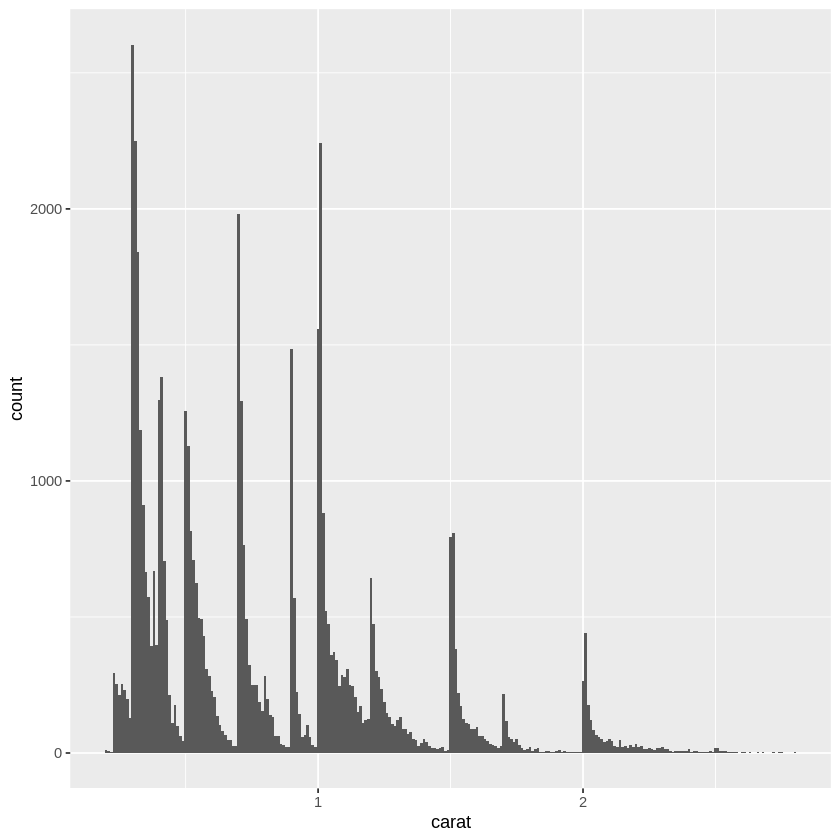

In [23]:
diamonds %>% filter(carat < 3) %>%
  ggplot(aes(x = carat)) + geom_histogram(binwidth = 0.01)

## **Identify outliers**

Outliers are observations that are unusual – data points that don’t seem to fit the general pattern.



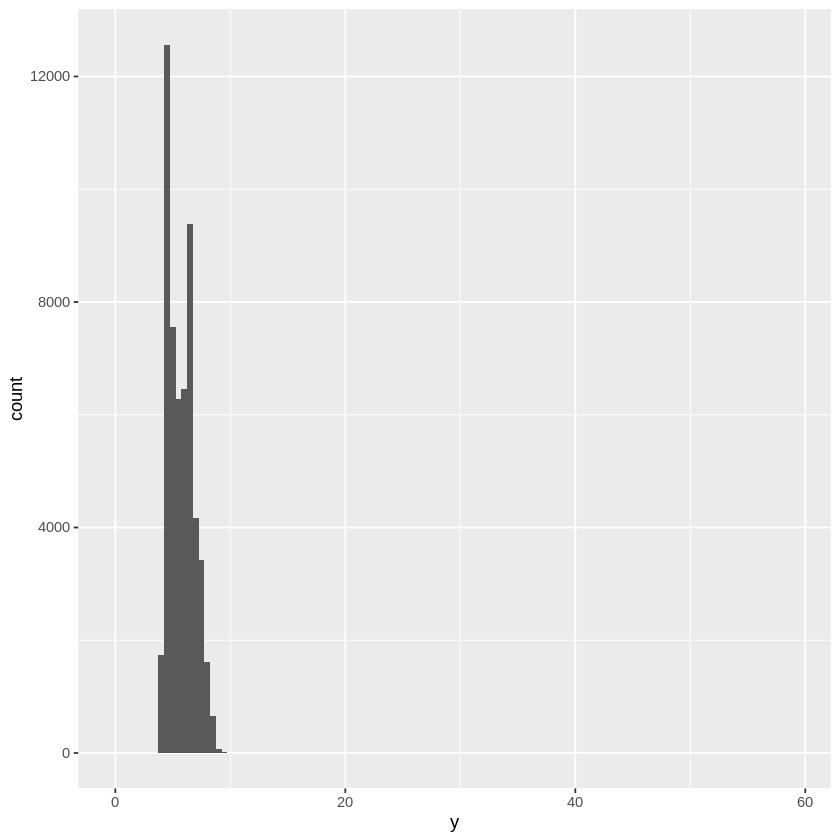

In [24]:
ggplot(diamonds) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5)

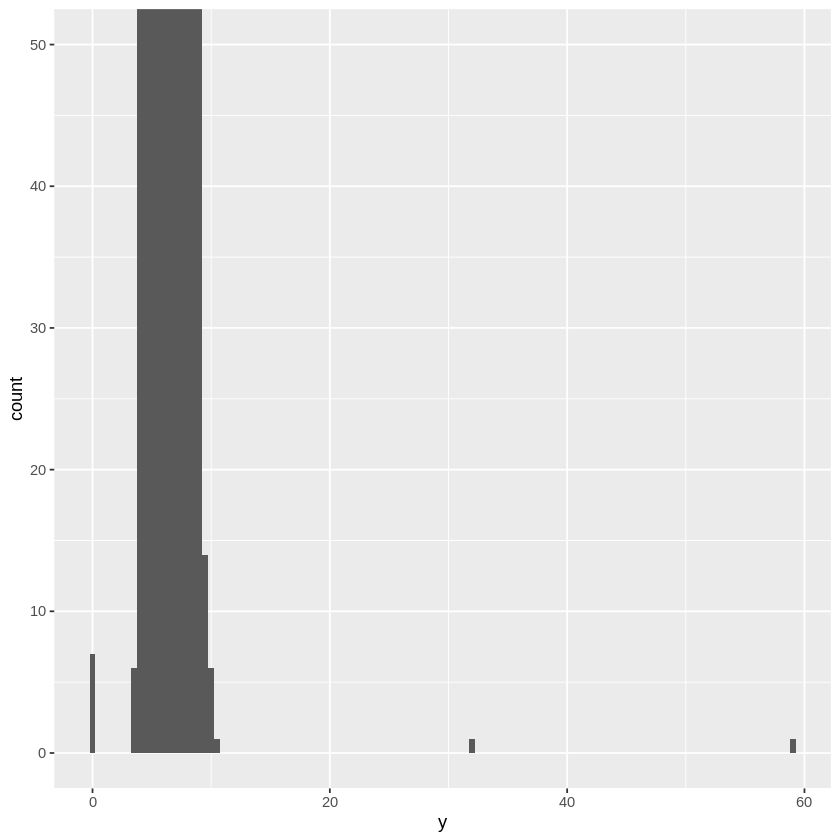

In [25]:
ggplot(diamonds) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50))

The y variable measures the length (in mm) of one of the three dimensions of a diamond.

In [26]:
diamonds %>% filter(y < 3 | y > 20) %>% 
  select(price, carat, x, y, z) %>% arrange(y)

price,carat,x,y,z
<int>,<dbl>,<dbl>,<dbl>,<dbl>
5139,1.00,0.00,0.0,0.00
6381,1.14,0.00,0.0,0.00
12800,1.56,0.00,0.0,0.00
15686,1.20,0.00,0.0,0.00
18034,2.25,0.00,0.0,0.00
2130,0.71,0.00,0.0,0.00
2130,0.71,0.00,0.0,0.00
2075,0.51,5.15,31.8,5.12
12210,2.00,8.09,58.9,8.06


Therefore, these must be entry errors! Why?

## **Exercises**
*   Explore the distribution of each of the x, y, and z variables in diamonds. What do you learn? Think about a diamond and how you might decide which dimension is the length, width, and depth.

*   Explore the distribution of price. Do you discover anything unusual or surprising? (Hint: Carefully think about the binwidth and make sure you try a wide range of values.)